In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('fivethirtyeight')

# CE 2120 Project - _Knee Joint Model_
### By Caroline Cook

In this project, I will be creating a double pendulum to model the movement of walking. I will use the Newton-Euler derived equation of motion to predict various movements, and compare it to real life accelerometer data that I recorded of myself walking. We will be able to see the relationship between acceleration and time, and if my equation derived data and recorded data mirror each other.

# Background

The double pendulum model has two links and two degrees of freedom. Link 1 (L1) plays the role of the femur, and link 2 (L2) acts as the tibia. The knee will be point mass 1 (m1) and the foot/ankle will be point mass 2 (m2). I've drawn some rough free body diagrams of the system, and also broken it up into two for each link. Ultimately though, the reaction forces will not be needed in the equation of motion. 
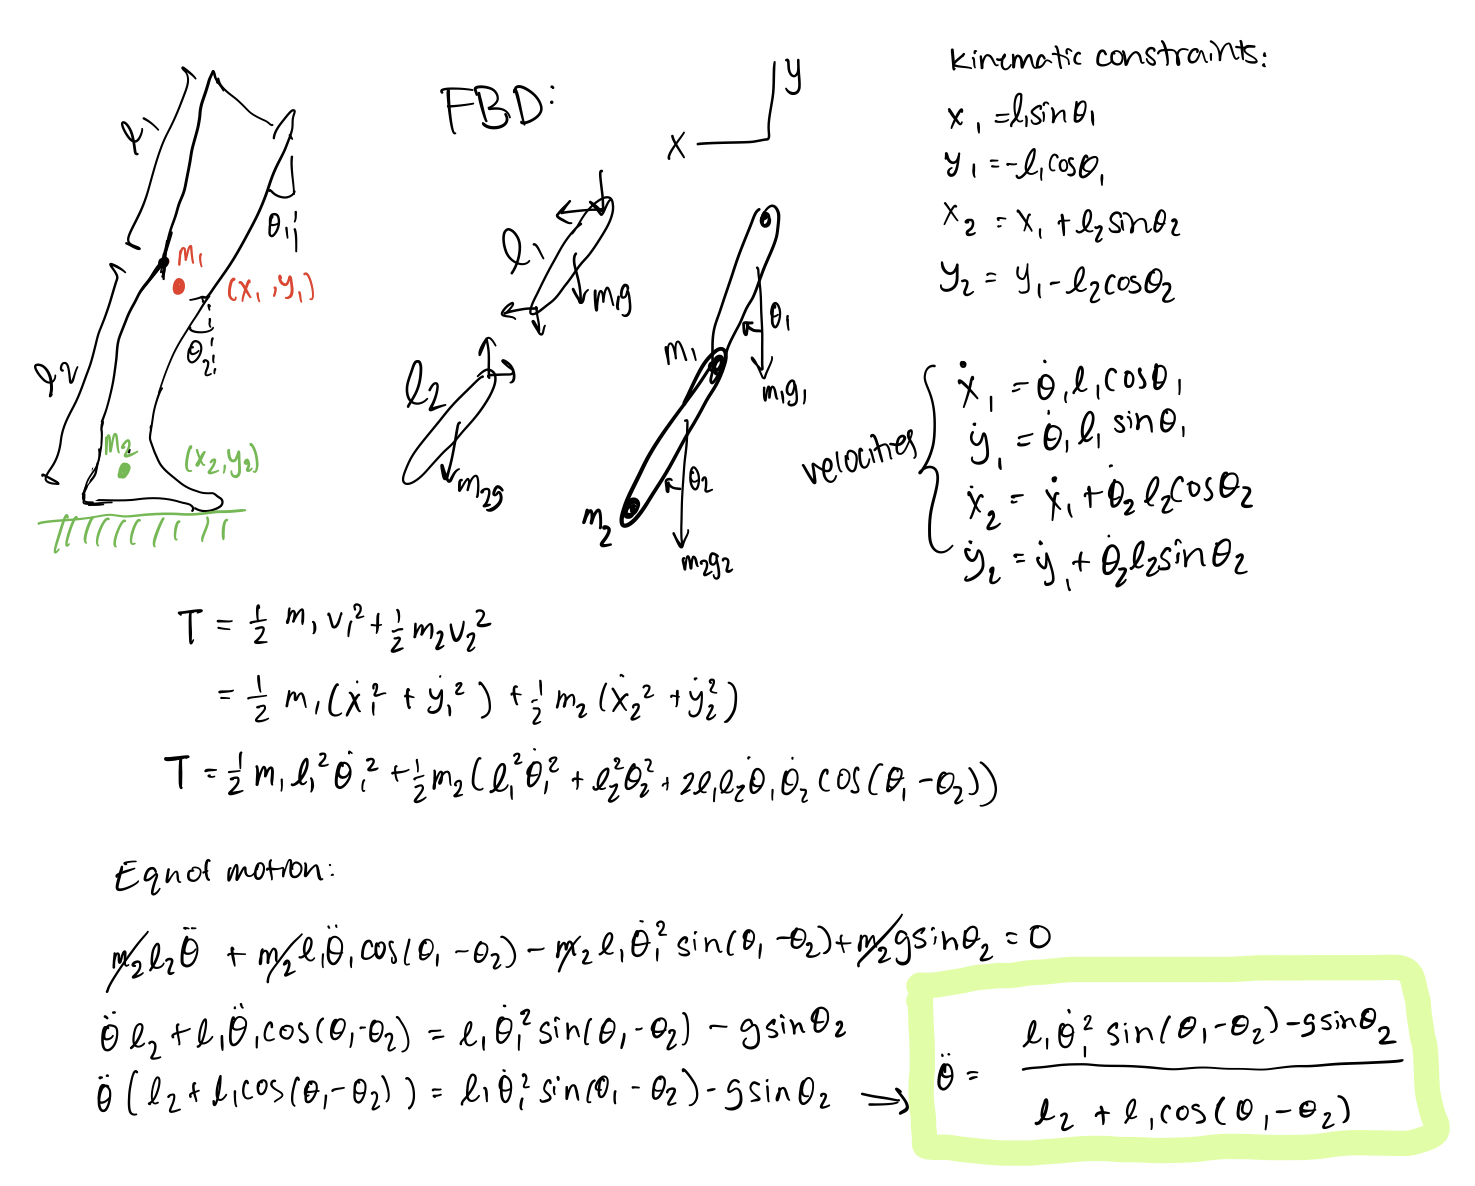

------

### Measurements
I measured my own leg, and recorded my femur (l1) to be 16 inches and l2 to be 15 inches. As for the masses, the force you put on your knees when you walk on even ground is one and a half times your body weight. I weigh 135 lbs, so 1 1/2 times that is 202.5 lb, and to keep things simple I evenly distributed it amongst the two masses, so each is 101.25 lbs or roughly 46 kg. As for angles, we can begin in full flexion (peak of motion for walking, and both links are aligned), and assign them to each be 60º (or pi/3 rad). Initial angular velocity can be 0 rad/s. 

In [4]:
g=9.81 #m/s^2
l1= 0.4 #m
l2= 0.38
m1= 46 #kg
m2= 46
theta1= np.linspace(0, np.pi/3)
theta2= np.pi/3
x1=l1*np.sin(theta1)
y1=-l1*np.cos(theta1)
x2=x1+l2*np.sin(theta2)
y2=y1-l2*np.cos(theta2)
dtheta=0#rad/sec
a=(l1*(dtheta^2)*np.sin(theta1-theta2)-g*np.sin(theta2))/(l2+l1*np.cos(theta1-theta2))

Text(0.5, 1.0, 'Acceleration VS Theta1')

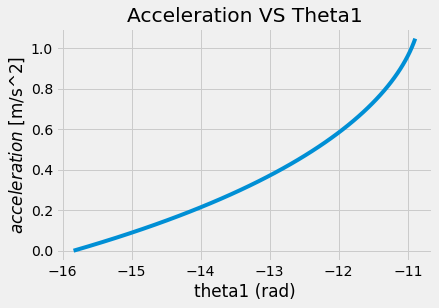

In [56]:
plt.plot(a,theta1)
plt.xlabel('theta1 (rad)')
plt.ylabel('$acceleration$ [m/s^2]')
plt.title('Acceleration VS Theta1')

In [58]:
np.arcsin(0.6/(l1+l2))*180/np.pi

50.284862768173795

In [22]:
#Acceleration Data

accel_data = np.array([
[0,6.088439025878906],
[57,6.015989685058594],
[124,6.6276177978515625],
[191,6.831344146728516],
[257,5.952371978759766],
[324,6.048172760009766],
[391,6.569837951660157],
[457,7.891140289306641],
[524,7.355254669189454],
[591,7.687563629150391],
[658,6.846462707519532],
[724,5.8652531433105475],
[790,2.827320556640625],
[859,2.4285498046875],
[924,4.203109588623047],
[991,2.9063562011718753],
[1058,-1.6227754211425782],
[1124,-1.1536509704589843],
[1191,0.018112335205078125],
[1258,1.22625],
[1324,0.21345611572265627],
[1391,-0.29728179931640625],
[1458,5.462291107177735],
[1524,-0.2625540161132813],
[1591,0.5255570983886719],
[1659,0.45999343872070314],
[1724,0.7653584289550782],
[1791,0.8496331787109376],
[1859,-1.982776794433594],
[1924,-2.871179351806641],
[1991,0.2947370910644531],
[2058,-0.5355862426757813],
[2124,-1.7609381103515627],
[2191,-0.49172744750976566],
[2258,0.7605683898925781],
[2324,0.052690429687500005],
[2391,2.7331663513183595],
[2458,-0.12678634643554687],
[2524,1.414109344482422],
[2591,3.9439984130859376],
[2659,1.8408718872070313],
[2723,1.5705340576171876],
[2791,0.9348060607910157],
[2858,0.6608757019042969],
[2923,0.271834716796875],
[2991,2.366279296875],
[3058,-2.8262727355957034],
[3124,1.5356565856933595],
[3191,4.428989868164063],
[3258,6.99630111694336],
[3324,-3.5637890625],
[3391,2.4459136962890624],
[3457,0.6776408386230469],
[3524,-0.9943821716308594],
[3591,-1.0603948974609376],
[3657,2.012864227294922],
[3724,0.9659413146972656],
[3791,2.4507037353515626],
[3857,3.8601727294921875],
[3924,3.975283355712891],
[3991,1.253792724609375],
[4057,1.0783575439453126],
[4124,0.8780740356445313],
[4191,2.3787034606933597],
[4257,-1.803300018310547],
[4324,-2.7295738220214845],
[4391,3.579506378173828],
[4458,8.964707794189454],
[4524,-0.9575587463378906],
[4591,0.05059478759765625],
[4658,1.2243040466308595],
[4724,-0.7447013854980469],
[4791,-0.6192622375488281],
[4857,2.2504202270507814],
[4924,1.033151550292969],
[4991,1.4199472045898438],
[5058,2.8192373657226564],
[5124,4.0372544860839845],
[5191,1.3222004699707033],
[5258,1.1322454833984374],
[5324,1.8567388916015626],
[5391,1.0196795654296875],
[5458,1.1301498413085938],
[5524,-2.079775085449219],
[5591,3.393892364501953],
[5658,5.264402618408203],
[5724,5.975873107910156],
[5791,-1.2722044372558594],
[5858,2.7021807861328124],
[5924,1.4897021484375002],
[5991,-0.3864962768554688],
[6058,-1.0559042358398438],
[6124,1.9118243408203126],
[6191,1.6149916076660158],
[6258,2.7785220336914063],
[6324,1.4711407470703126],
[6391,4.279301147460938],
[6458,0.6807843017578126],
[6524,1.375938720703125],
[6591,1.038240966796875],
[6658,-0.05523513793945313],
[6724,0.8074209594726562],
[6791,-3.4194891357421877],
[6858,2.462828521728516],
[6924,6.651717681884766],
[6990,6.607709197998047],
[7058,-1.9749929809570312],
[7123,2.0372634887695313],
[7190,-0.3998185729980469],
[7258,-1.6516653442382814],
[7323,1.031205596923828],
[7390,0.2856060791015625],
[7458,1.8754499816894532],
[7523,1.906285858154297],
[7590,5.2558703613281255],
[7658,2.896776123046875],
[7724,-0.6475534057617188],
[7790,3.500021667480469],
[7858,0.8405021667480469],
[7924,-0.18546432495117188],
[7991,-2.2552102661132816],
[8058,2.5927583312988283],
[8124,7.535779266357422],
[8191,3.8886135864257816],
[8258,-1.7265097045898439],
[8324,2.3510110473632815],
[8391,-0.40071670532226566],
[8458,0.09624984741210937],
[8524,1.4718891906738283],
[8591,1.0234217834472656],
[8658,1.400787048339844],
[8724,1.3956976318359375],
[8791,3.750450897216797],
[8858,2.8163932800292972],
[8924,-0.47615982055664063],
[8991,0.9877958679199219],
[9057,0.30865814208984377],
[9124,2.1207897949218752],
[9191,-1.7640815734863282],
[9257,1.0044113159179688],
[9324,4.470603332519532],
[9391,6.392157440185547],
[9458,-0.20627105712890625],
[9524,2.2052142333984377],
[9591,0.6014492797851563],
[9658,-0.5774990844726563],
[9724,-0.5375321960449219],
[9791,2.0938458251953125],
[9857,-1.8345849609375],
[9924,1.0600955200195312],
[9991,2.325414276123047],
[10058,4.619543609619141],
[10124,1.3482463073730468],
[10191,0.6773414611816406],
[10258,0.5769003295898438],
[10324,0.24339385986328127],
[10391,2.9428802490234376],
[10456,-4.0899449157714844],
[10524,3.496279449462891],
[10591,8.412805480957031],
[10657,0.31524444580078126],
[10724,1.9484980773925782],
[10791,1.5277230834960938],
[10857,-0.2077679443359375],
[10924,-1.115929412841797],
[10991,2.433190155029297],
[11057,-1.3118719482421877],
[11124,0.8164022827148438],
[11191,3.0567933654785158],
[11257,3.247496795654297],
[11324,2.202370147705078],
[11391,0.29114456176757814],
[11457,2.2676344299316407],
[11523,1.9285894775390626],
[11591,1.1295510864257814],
[11657,-3.6717146301269534],
[11723,4.044439544677735],
[11791,8.632847900390626],
[11857,-1.9095790100097658],
[11924,0.5596861267089844],
[11991,1.485959930419922],
[12057,0.05882766723632813],
[12124,-1.2364288330078126],
[12191,1.5269746398925783],
[12257,-1.1187734985351563],
[12324,3.7979022216796876],
[12391,1.7284556579589845],
[12457,4.189038848876954],
[12523,2.1203407287597655],
[12590,0.9583071899414063],
[12657,1.156644744873047],
[12723,0.305364990234375],
[12790,1.3332774353027343],
[12857,-3.4750236511230472],
[12923,2.9154872131347656],
[12990,10.07105712890625],
[13057,6.455775146484375],
[13123,-0.6867718505859375],
[13190,0.2537223815917969],
[13257,0.19100280761718752],
[13324,-0.26689498901367187],
[13391,1.242715759277344],
[13457,-0.36539016723632817],
[13524,-2.661914520263672],
[13591,-0.4397854614257813],
[13657,2.245330810546875],
[13724,2.4231610107421875],
[13791,3.0135333251953127],
[13857,1.7965640258789064],
[13924,1.0606942749023438],
[13991,0.03547622680664063],
[14057,0.4076023864746094],
[14124,0.47256729125976565],
[14191,0.08382568359375],
[14257,-0.7824229431152344],
[14324,1.5362553405761719],
[14391,7.250921630859375],
[14457,1.9643650817871094],
[14524,1.515897674560547],
[14590,0.8942404174804688],
[14657,-0.011825408935546875],
[14724,0.026943969726562503],
[14791,0.09265731811523438],
[14857,1.8271005249023438],
[14924,0.2484832763671875],
[14991,-1.713486785888672],
[15057,0.056133270263671875],
[15124,3.006947021484375],
[15191,5.926326141357422],
[15257,6.840475158691406],
[15324,3.896397399902344],
[15391,3.133433990478516],
[15457,1.435664520263672],
[15524,0.38739440917968754],
[15591,0.2785707092285156],
[15657,1.0241702270507813],
[15724,1.3702505493164063],
[15791,1.999691619873047]])

In [37]:
accel_data = np.loadtxt('./Untitled Experiment - Recording 1.txt', skiprows= 1, delimiter= ',')

In [38]:
accel_data[i1:i2, :].shape

(91, 4)

Text(0.5, 1.0, 'mean a_x = 0.80 m/s/s\na_y = 9.33\na_z=2.50')

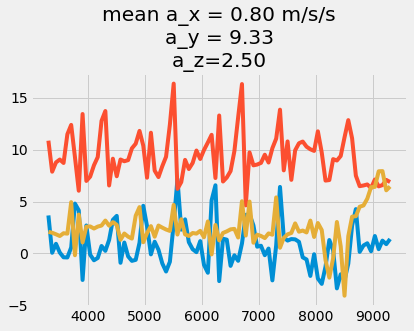

In [44]:
i1 = 50
i2 = 500
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 1])
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 2])
plt.plot(accel_data[i1:i2, 0], accel_data[i1:i2, 3])

# plt.plot(accel_data[i1:i2, 0], np.ones(i2-i1)*accel_data[i1:i2,1].mean())
plt.title('mean a_x = {:1.2f} m/s/s\na_y = {:1.2f}\na_z={:1.2f}'.format(
    accel_data[i1:i2,1].mean(),
    accel_data[i1:i2,2].mean(),
    accel_data[i1:i2,3].mean()))

Text(0.5, 1.0, 'mean |a| = 9.66 m/s/s')

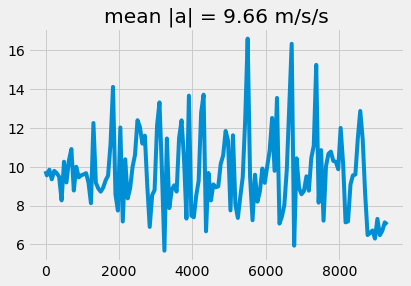

In [55]:
mag_a = np.sqrt(np.sum(accel_data[:, 1:3]**2, axis = 1))

plt.plot(accel_data[:,0], mag_a)
plt.title('mean |a| = {:1.2f} m/s/s'.format(mag_a.mean()))

## Proposed Outline:

### Background

- What are you trying to model?
- How are you simplifying the model (here: aim for rigid bodies, massless springs, etc.)
- Draw a free body diagram and show the motion

### Model and method

- Show how you create your model: aim to explain to another student in CE2120
- State your assumptions, constants, equations
- Show your analysis
- What is important about your result? Show a graph or two to demonstrate what's important

### Wrapping up

- What was the original goal in your background? How did you meet the goal?
- What was an interesting fact you learned from this analysis? Did it change how you see this device?
- Any next steps? were there missing parts to the analysis? how could you make it better?
